Link: [Revisiting a Concrete Strength regression](https://www.kaggle.com/datasets/maajdl/yeh-concret-data)

Na engenharia civil, o concreto se destaca como o material fundamental, essencial para uma infinidade de projetos de construção. Sua resistência à compressão, um parâmetro crítico, reflete sua capacidade de suportar cargas aplicadas. Compreender e prever essa resistência é vital para garantir a integridade estrutural e a segurança.

Em busca desse objetivo, foi compilado meticulosamente um conjunto de dados que captura as complexidades da composição do concreto e da idade em relação à resistência à compressão. Este conjunto de dados compreende 1030 instâncias, sendo que cada instância é caracterizada por nove atributos. Entre esses atributos, estão oito variáveis de entrada quantitativas que representam vários componentes da mistura de concreto, juntamente com uma variável de saída quantitativa que denota a resistência à compressão do concreto.

Claro, aqui está a tabela utilizando markdown:

| Nome do Atributo           | Tipo de Dados | Unidade de Medida     | Descrição                                                                                               |
|-------------------------|---------------|---------------------|------------------------------------------------------------------------------------------------------|
| Cimento (componente 1)      | Quantitativo  | kg em uma mistura m3 | Variável de entrada representando o cimento utilizado na mistura de concreto.                          |
| Escória de Alto Forno (componente 2) | Quantitativo  | kg em uma mistura m3 | Variável de entrada representando a escória de alto forno utilizada na mistura de concreto.            |
| Cinza Volante (componente 3)     | Quantitativo  | kg em uma mistura m3 | Variável de entrada representando a cinza volante utilizada na mistura de concreto.                    |
| Água (componente 4)         | Quantitativo  | kg em uma mistura m3 | Variável de entrada representando a água utilizada na mistura de concreto.                             |
| Superplastificante (componente 5) | Quantitativo  | kg em uma mistura m3 | Variável de entrada representando o superplastificante utilizado na mistura de concreto.              |
| Agregado Graúdo (componente 6)   | Quantitativo  | kg em uma mistura m3 | Variável de entrada representando o agregado graúdo utilizado na mistura de concreto.                  |
| Agregado Fino (componente 7)    | Quantitativo  | kg em uma mistura m3 | Variável de entrada representando o agregado fino utilizado na mistura de concreto.                    |
| Idade                   | Quantitativo  | Dia (1~365)         | Variável de entrada representando a idade do concreto em dias.                                        |
| Resistência à Compressão do Concreto | Quantitativo  | MPa                 | Variável de saída representando a resistência à compressão do concreto, em megapascal (MPa).           |

Empregando técnicas de regressão linear, exploramos este conjunto de dados para desvendar a intricada relação entre a composição do concreto, a idade e a resistência à compressão. Ao alavancar metodologias estatísticas, buscamos construir modelos preditivos que ofereçam insights sobre os fatores que moldam o desempenho do concreto, capacitando engenheiros e partes interessadas com ferramentas inestimáveis para otimizar práticas de construção e aprimorar a durabilidade estrutural.

# 1) Carregando os Dados

In [1]:
import pandas as pd

In [2]:
concrete_strength_dataset = pd.read_csv('../data/data.csv')

# 2) Pré-exploração dos Dados

Ultilizando o método head() é possível visualizar as cinco primeiras linhas do DataFrame.

In [3]:
concrete_strength_dataset.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Ultilizando o método tail() é possível visualizar as cinco últimas linhas do DataFrame.

In [4]:
concrete_strength_dataset.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


O método info() é utilizado para uma rápida descrição dos dados.

In [5]:
concrete_strength_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


É possível utilizar o método value_counts() em um DataFrame para contar a quantidade de registros de concretos por idade.

In [6]:
concrete_strength_dataset['age'].value_counts()

age
28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

O método describe() mostra um resumo dos atributos númericos.

In [7]:
concrete_strength_dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Um histograma mostra o número de instâncias (no eixo vertical) que possuem um determinado intervalo de valores (no eixo horizontal).

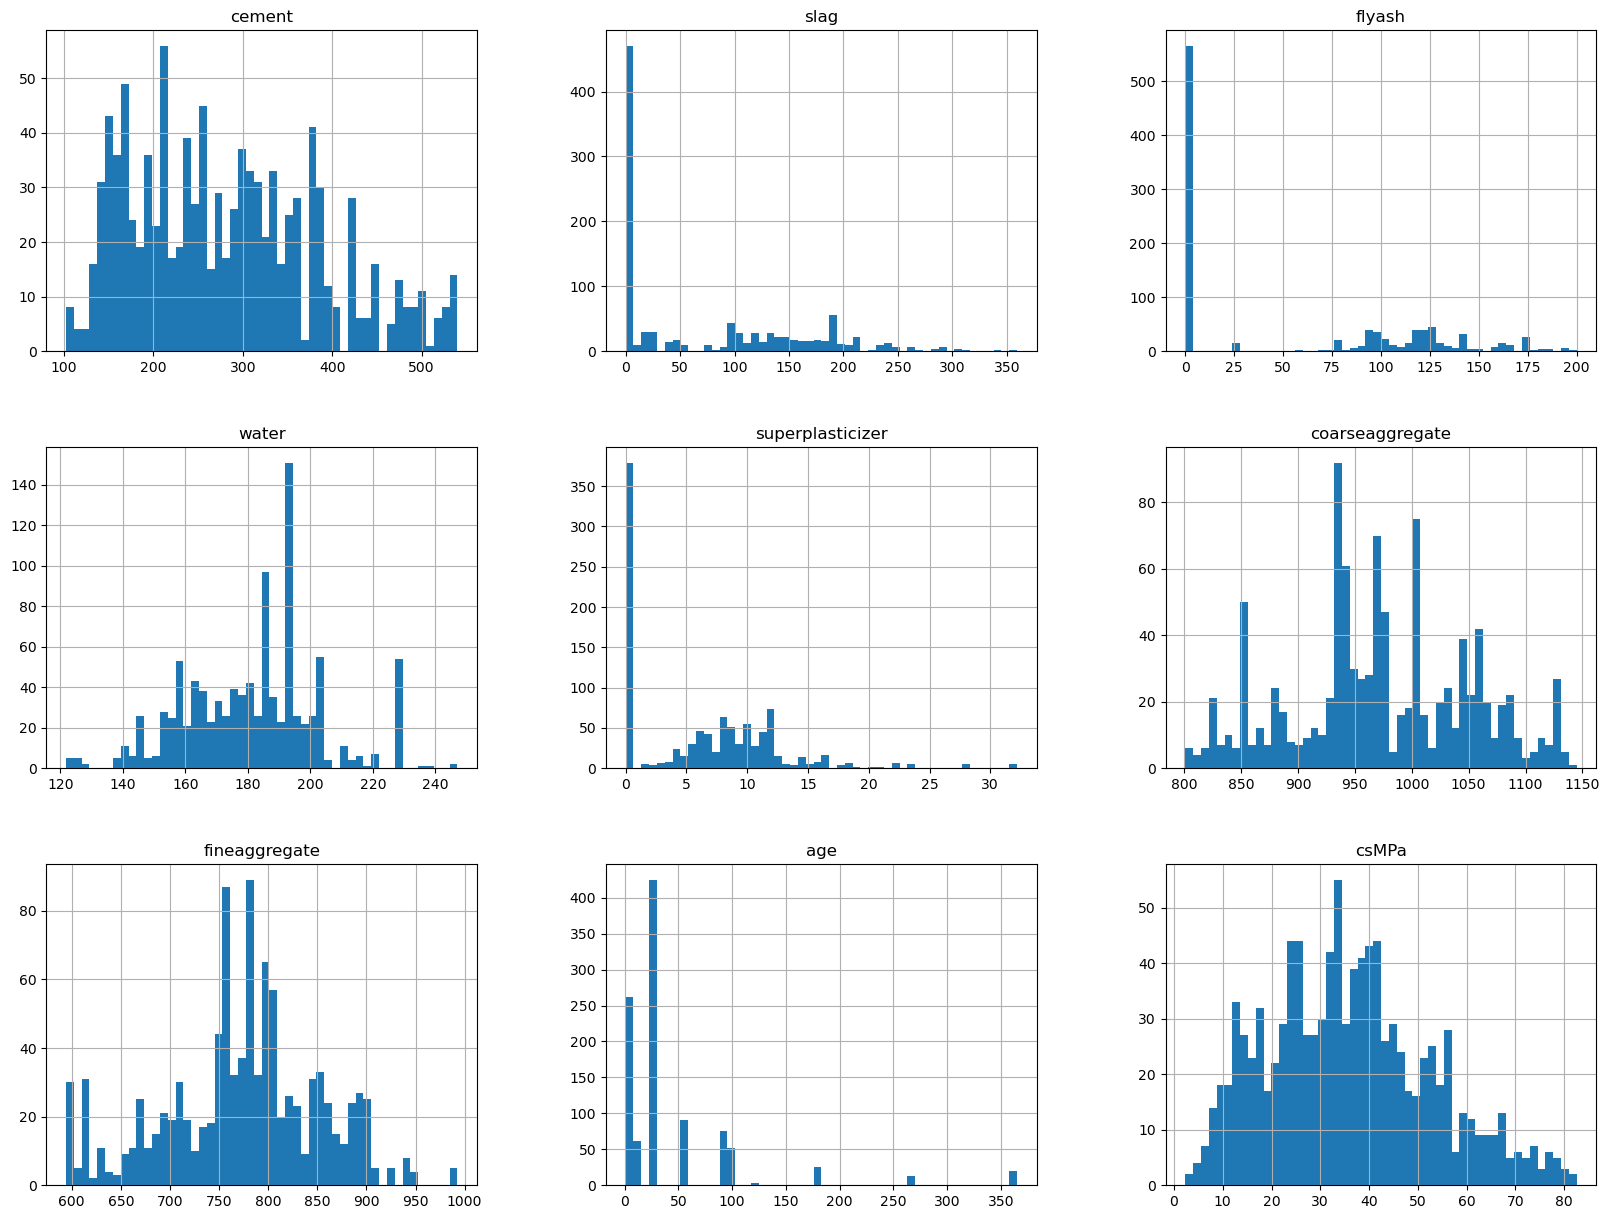

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
concrete_strength_dataset.hist(bins=50, figsize=(20,15))
plt.show()

O método .corr() calcula a correlação entre os atributos de um DataFrame.

In [9]:
concrete_strength_dataset.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


# 3) Criando um conjunto de Testes

Seed é a semente do gerador de números aleatórios, ao definir um valor constante para o seed os valores aleatórios gerados serão sempre os mesmos.

In [11]:
import numpy as np

In [12]:
seed = 42

Para garantir que o conjunto de amostragem (teste) mantenham a proporção vamos utilizar a estratégia de amostragem estratificada. Para isso vamos utilizar o atributo cement, pois ele apresenta a maior correlação para determinar o valor de csMPa. Como cement é um atributo numérico contínuo, primeiro precisamos criar um atributo na categoria cement.

In [15]:
concrete_strength_dataset['cement_cat'] = np.ceil(concrete_strength_dataset['cement'] / 104)
concrete_strength_dataset['cement_cat'].where(concrete_strength_dataset['cement_cat'] < 5, 5.0, inplace=True)

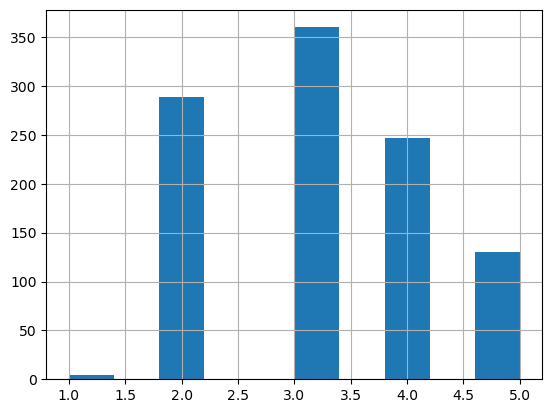

In [16]:
concrete_strength_dataset['cement_cat'].hist()
plt.show()

Agora é possível fazer uma amostragem estratificada com base no atributo cement_cat.Para isso podemos utilizar a classe StratifieldShuffleSplit do SciKit-Learn.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
for train_index, test_index in split.split(concrete_strength_dataset, concrete_strength_dataset['cement_cat']):
  strat_train_set = concrete_strength_dataset.iloc[train_index]
  strat_test_set = concrete_strength_dataset.iloc[test_index]

Vamos analisar as proporções da categoria cement_cat no conjunto de testes.

In [19]:
strat_test_set['cement_cat'].value_counts() / len(strat_test_set)

cement_cat
3.0    0.349515
2.0    0.281553
4.0    0.237864
5.0    0.126214
1.0    0.004854
Name: count, dtype: float64

O SciKit-Learn fornece uma função mais simples para dividir o conjunto de dados em teste e trainamento. A função mais simples é a train_test_split().

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(concrete_strength_dataset, test_size=0.2, random_state=seed)

In [21]:
test_set['cement_cat'].value_counts() / len(test_set)

cement_cat
3.0    0.398058
2.0    0.271845
4.0    0.252427
5.0    0.077670
Name: count, dtype: float64

Observe que ao utilizar a função train_test_split() as proporções do atributo categorico cement_cat ficaram muito diferentes do que representa no conjunto de dados.

Agora vamos remover o atributo cement_cat para que os dados voltem ao seu estado natural.

In [22]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('cement_cat', axis=1, inplace=True)

/tmp/ipykernel_29877/1965713558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('cement_cat', axis=1, inplace=True)
/tmp/ipykernel_29877/1965713558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('cement_cat', axis=1, inplace=True)


# 4) Explorando os Dados

Vamos criar um cópia dos dados de treino para que possamos treinar com a cópia sem prejudicar os verdadeiros dados de treinos.

In [23]:
concrete_strength = strat_train_set.copy()

Já analisamos as correlações entre os atributos, mas podemos análisar como cada atributo se correlaciona com o valor csMPa

In [24]:
corr_matrix = concrete_strength.corr()
corr_matrix['csMPa'].sort_values(ascending=False)

csMPa               1.000000
cement              0.517547
superplasticizer    0.370111
age                 0.319153
slag                0.135352
flyash             -0.122483
fineaggregate      -0.161103
coarseaggregate    -0.172448
water              -0.287400
Name: csMPa, dtype: float64

Uma alternativa para examinar a correlação entre os atributos é empregar a função scatter_matrix do Pandas. Essa função permite visualizar graficamente a relação entre cada par de atributos numéricos, facilitando a análise das possíveis correlações entre eles.

In [25]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='cement', ylabel='cement'>,
        <Axes: xlabel='water', ylabel='cement'>,
        <Axes: xlabel='superplasticizer', ylabel='cement'>,
        <Axes: xlabel='age', ylabel='cement'>,
        <Axes: xlabel='csMPa', ylabel='cement'>],
       [<Axes: xlabel='cement', ylabel='water'>,
        <Axes: xlabel='water', ylabel='water'>,
        <Axes: xlabel='superplasticizer', ylabel='water'>,
        <Axes: xlabel='age', ylabel='water'>,
        <Axes: xlabel='csMPa', ylabel='water'>],
       [<Axes: xlabel='cement', ylabel='superplasticizer'>,
        <Axes: xlabel='water', ylabel='superplasticizer'>,
        <Axes: xlabel='superplasticizer', ylabel='superplasticizer'>,
        <Axes: xlabel='age', ylabel='superplasticizer'>,
        <Axes: xlabel='csMPa', ylabel='superplasticizer'>],
       [<Axes: xlabel='cement', ylabel='age'>,
        <Axes: xlabel='water', ylabel='age'>,
        <Axes: xlabel='superplasticizer', ylabel='age'>,
        <Axes: xlabel='age', ylabel='

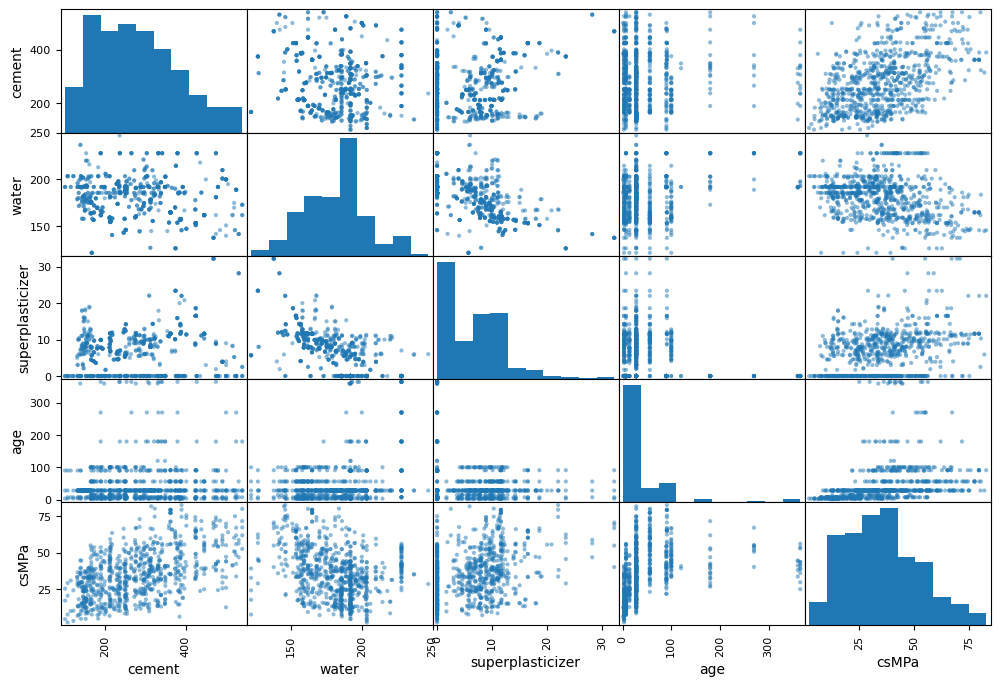

In [27]:
attributes = ['cement', 'water', 'superplasticizer', 'age', 'csMPa']
scatter_matrix(concrete_strength[attributes], figsize=(12, 8))

Vamos criar um novo atributo que pode nos trazer novas ideias sobre os dados.

In [28]:
concrete_strength['cement_per_water'] = concrete_strength['cement'] / concrete_strength['water']

Agora vamos calcular a correlação para esse novo atributo

In [29]:
concrete_strength.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,cement_per_water
cement,1.000000,-0.262238,-0.383496,-0.087422,0.108077,-0.140229,-0.203381,0.072839,0.517547,0.939639
slag,-0.262238,1.000000,-0.348000,0.125721,0.018724,-0.270464,-0.297974,-0.043694,0.135352,-0.239975
flyash,-0.383496,-0.348000,1.000000,-0.252116,0.371917,0.002673,0.070149,-0.155854,-0.122483,-0.296663
water,-0.087422,0.125721,-0.252116,1.000000,-0.646021,-0.184326,-0.460257,0.254649,-0.287400,-0.398017
superplasticizer,0.108077,0.018724,0.371917,-0.646021,1.000000,-0.270238,0.226650,-0.179548,0.370111,0.336785
coarseaggregate,-0.140229,-0.270464,0.002673,-0.184326,-0.270238,1.000000,-0.172113,-0.001893,-0.172448,-0.114908
fineaggregate,-0.203381,-0.297974,0.070149,-0.460257,0.226650,-0.172113,1.000000,-0.131624,-0.161103,-0.024120
age,0.072839,-0.043694,-0.155854,0.254649,-0.179548,-0.001893,-0.131624,1.000000,0.319153,-0.011290
csMPa,0.517547,0.135352,-0.122483,-0.287400,0.370111,-0.172448,-0.161103,0.319153,1.000000,0.579321
cement_per_water,0.939639,-0.239975,-0.296663,-0.398017,0.336785,-0.114908,-0.024120,-0.011290,0.579321,1.000000


# 5) Preparando os dados para ML

Vamos novamente copiar strat_train_set e vamos separa os previsores e os rótulos

In [30]:
concrete_strength = strat_train_set.drop('csMPa', axis=1)
concrete_strength_labels = strat_train_set['csMPa'].copy()

Com algumas exceções, os algoritmos de aprendizado de máquina geralmente não performam bem quando os atributos numéricos de entrada têm escalas muito distintas. Por isso, é necessário aplicar o escalonamento das características aos dados. Duas abordagens comuns para garantir que todos os atributos estejam na mesma escala são a escala min-max e a padronização.

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
concrete_strength_prepared = scaler.fit_transform(concrete_strength)

In [33]:
concrete_strength_prepared.min(), concrete_strength_prepared.max()

(0.0, 1.0000000000000002)

# 6) Selecione e treine um modelo

Treinando um modelo de Regressão Linear.

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(concrete_strength_prepared, concrete_strength_labels)

LinearRegression()

In [35]:
some_data = concrete_strength.iloc[:5]
some_labels = concrete_strength_labels.iloc[:5]

In [36]:
scaler = MinMaxScaler()
some_data_prepared = scaler.fit_transform(some_data)

In [37]:
lin_reg.predict(some_data_prepared)

array([ 63.37995763,  48.91483026, 119.09667163,  73.71506693,
        30.56508408])

In [38]:
list(some_labels)

[37.92, 37.17, 57.6, 38.02, 23.8]

Vamos medir o RMSE desse modelo de regressão em todo o conjunto de treinamento. Para isso pordemos utilizar a função mean_squared_error do SciKit-Learn.

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
concrete_strength_predictions = lin_reg.predict(concrete_strength_prepared)

In [42]:
forest_mse = mean_squared_error(concrete_strength_labels, concrete_strength_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10.285282168066242

Treinando um modelo de Árvore de Decisão.

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(concrete_strength_prepared, concrete_strength_labels)

DecisionTreeRegressor()

In [44]:
forest_predictions = tree_reg.predict(concrete_strength_prepared)
forest_mse = mean_squared_error(concrete_strength_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.0673605083066156

A validação cruzada K-fold consiste em dividir aleatoriamente o conjunto de treinamento em 10 subconjuntos distintos, chamados de partes (folds). Em seguida, o modelo da Árvore de Decisão é treinado e avaliado 10 vezes, selecionando uma parte diferente para avaliação em cada iteração e utilizando as outras 9 partes para treinamento.

In [45]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, concrete_strength_prepared, concrete_strength_labels, scoring='neg_mean_squared_error', cv=10)

In [47]:
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([7.58510837, 9.6778886 , 7.40155806, 6.87825498, 5.83960576,
       5.97667024, 6.9602283 , 5.92907481, 6.9215688 , 6.09260012])

In [48]:
tree_rmse_scores.mean(), tree_rmse_scores.std()

(6.9262558039948825, 1.0957570419323204)

Calculando as mesmas pontuações para o modelo de Regressão Linear.

In [49]:
lin_scores = cross_val_score(lin_reg, concrete_strength_prepared, concrete_strength_labels, scoring='neg_mean_squared_error', cv=10)

In [51]:
tree_rmse_scores = np.sqrt(-lin_scores)
tree_rmse_scores

array([10.29681929, 10.73028729, 11.32568602,  9.7992291 , 10.55690819,
       10.39529735, 11.35012562, 10.15039298,  9.29931869, 10.15111089])

In [52]:
tree_rmse_scores.mean(), tree_rmse_scores.std()

(10.405517543768479, 0.6000317981709163)

Treinando um modelo de Florestas Aleatórias.

In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(concrete_strength_prepared, concrete_strength_labels)

RandomForestRegressor()

In [55]:
forest_predictions = forest_reg.predict(concrete_strength_prepared)
forest_mse = mean_squared_error(concrete_strength_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.07868093832483

Aplicando validação cruzada.

In [56]:
forest_scores = cross_val_score(forest_reg, concrete_strength_prepared, concrete_strength_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
forest_rmse_score

array([4.8350987 , 6.029271  , 5.534514  , 4.33744479, 4.51799475,
       4.94961301, 5.31894155, 4.23896242, 5.50372737, 5.41907718])

In [57]:
forest_rmse_score.mean(), forest_rmse_score.std()

(5.068464476017382, 0.5576323850198657)

## 7) Ajuste seu modelo

O GridSearchCV do Scikit-Learn avalia todas as combinações possíveis dos hiperparâmetros por meio da validação cruzada.

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [60]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(concrete_strength_prepared, concrete_strength_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [61]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

7.3740301452174695 {'max_features': 2, 'n_estimators': 3}
5.8666165624037845 {'max_features': 2, 'n_estimators': 10}
5.732188573953982 {'max_features': 2, 'n_estimators': 30}
6.476504737958041 {'max_features': 4, 'n_estimators': 3}
5.65171084614199 {'max_features': 4, 'n_estimators': 10}
5.30353386832716 {'max_features': 4, 'n_estimators': 30}
6.251522817262676 {'max_features': 6, 'n_estimators': 3}
5.592855011274937 {'max_features': 6, 'n_estimators': 10}
5.220581149245856 {'max_features': 6, 'n_estimators': 30}
6.838749752653671 {'max_features': 8, 'n_estimators': 3}
5.593938142766741 {'max_features': 8, 'n_estimators': 10}
5.371451917058495 {'max_features': 8, 'n_estimators': 30}
6.125228235644527 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5.252888641530454 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6.304947594098319 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5.21326065240169 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

## 7) Avalie seu sistema no conjunto de testes

In [63]:
final_model = grid_search.best_estimator_

In [64]:
X_test = strat_test_set.drop('csMPa', axis=1)
y_test = strat_test_set['csMPa'].copy()

In [66]:
scaler = MinMaxScaler()
X_test_prepared = scaler.fit_transform(X_test)

In [67]:
final_predictions = final_model.predict(X_test_prepared)

In [69]:
final_mse = mean_squared_error(y_test, final_predictions)
final_mse

64.68563039199029